In [1]:
# N-gram and Wordcloud coding helping from Clément Delteil
import csv
import chart_studio
import re
import string
# import emot
import collections
import ipywidgets
import contractions
import cufflinks
import nltk.tokenize

import chart_studio.plotly as py
import chart_studio.tools as tls
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import numpy as np

from textblob import TextBlob
#from google.colab import widgets
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import RegexpTokenizer
from nltk.probability import FreqDist
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

pd.set_option('display.max_colwidth', None)
sid = SentimentIntensityAnalyzer()
# emot_obj = emot.core.emot()
cufflinks.set_config_file(world_readable=True, theme='pearl')
cufflinks.go_offline()
pio.renderers.default = 'colab'

In [2]:
df = pd.read_json("../final_data_for_machine_learning.json")

In [3]:
df.sample(n=5)

,comment,category,channel,video_url,video_id,channel_size,identity,expanded_text,processed_text,score
59344,"Deadshot is gone.\nits, SlapDead now",Film,https://www.youtube.com/@flashbackfm,https://www.youtube.com/watch?v=SF0w2B6DNUE,SF0w2B6DNUE,large,unknown,"Deadshot is gone.\nits, SlapDead now","Deadshot is gone. its, SlapDead now",0
185897,Coś pięknego .Nie moge przestać tego słuchać. A przed wszystkim głosu Caseya,People,https://www.youtube.com/@samtsui,https://www.youtube.com/watch?v=gGgakt3niys,gGgakt3niys,small,lgbt,Coś pięknego .Nie moge przestać tego słuchać. A przed wszystkim głosu Caseya,Coś pięknego .Nie moge przestać tego słuchać. A przed wszystkim głosu Caseya,1
62321,Tobey is a better acter,Film,https://www.youtube.com/@topmovieclips5056,https://www.youtube.com/watch?v=TcGHKrh8J8I,TcGHKrh8J8I,large,unknown,Tobey is a better acter,Tobey is a better acter,1
120525,"Keemstar, the macho-chad",Problematic,https://www.youtube.com/@DramaAlert,https://www.youtube.com/watch?v=n38Qxi7TVWo,n38Qxi7TVWo,large,unknown,"Keemstar, the macho-chad","Keemstar, the macho-chad",1
9431,"The music so is fucking annoying, its just the same loop over and over again with a one second pause between it and it so fucking annoying.",Film,https://www.youtube.com/@TheFilmJunkee,https://www.youtube.com/watch?v=EhSFtCfb5UQ,EhSFtCfb5UQ,small,unknown,"The music so is fucking annoying, its just the same loop over and over again with a one second pause between it and it so fucking annoying.","The music so is fucking annoying, its just the same loop over and over again with a one second pause between it and it so fucking annoying.",0


In [4]:
# Display the 20 most present bi-grams
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

common_words = get_top_n_bigram(df['processed_text'], 20)

In [5]:
common_words

[('lama lama lama', 141),
 ('ha ha ha', 133),
 ('happy 7th anniversary', 125),
 ('pov watching 2023', 115),
 ('250 тысяч тонн', 90),
 ('сброшу на вас', 89),
 ('на вас 250', 78),
 ('love love love', 73),
 ('bile emekli olurkengün', 66),
 ('emekli olurkengün bile', 66),
 ('olurkengün bile emekli', 66),
 ('good old days', 64),
 ('does look like', 64),
 ('does make sense', 63),
 ('тысяч тонн тротила', 62),
 ('grants pass oregon', 61),
 ('long time ago', 58),
 ('7th anniversary blackpink', 58),
 ('вас 250 тысяч', 57),
 ('yes yes yes', 55)]

In [6]:
df1 = pd.DataFrame(common_words, columns = ['Comment_Text' , 'count'])
df1.head()

,Comment_Text,count
0,lama lama lama,141
1,ha ha ha,133
2,happy 7th anniversary,125
3,pov watching 2023,115
4,250 тысяч тонн,90


In [7]:
df1_sorted = df1.sort_values("count")
df1_sorted.head()

,Comment_Text,count
19,yes yes yes,55
18,вас 250 тысяч,57
17,7th anniversary blackpink,58
16,long time ago,58
15,grants pass oregon,61


In [8]:
# df1.groupby('Comment_Text').sum()['count'].sort_values(ascending=False).iplot(
#     kind='bar',
#     yTitle='Count',
#     linecolor='black',
#     title='Top 20 bigrams in Comment before removing spams')

<Axes: ylabel='Comment_Text'>

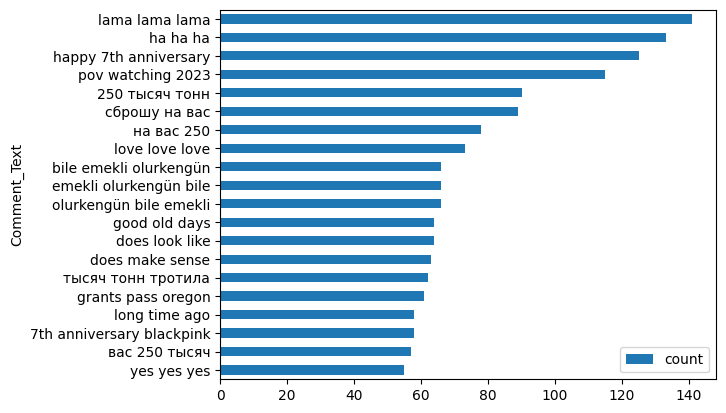

In [9]:
df1_sorted.plot.barh(x="Comment_Text")